# Building my dataset

I decided to work with just one dataset for now, for trial purposes. I will add on to this dataset after testing architectures. I opted for the **"NSFW Data Source URLs" developed by Data Scientist Evgeny Bazarov.** This is a large and high-quality image dataset of sexually explicit images containing over 1.58 million data volumes in 159 categories. 

Link: https://github.com/EBazarov/nsfw_data_source_urls

I examined the contents of the folders and devised a method of approach for data extraction as follows:

- # Step 1: Determining the type of classifier and extracting URL lists

I have decided to construct a binary classifier (two outcomes: NSFW or not-NSFW). I noticed that for each category of NSFW, it had multiple sub-categories. We do not need such a level of intricacy. I noticed that inside the files of each category is a .txt file that contains all the URLs of the subcategories. So, I extracted those specific .txt files and merged them into one COMPLETE.txt file - which contains all URLs (1,586,929).

In [25]:
import re
import csv
import numpy as np
import pandas as pd
import urllib
import os, shutil, glob
import requests
import random
import hashlib
import time
from scipy.misc import imread, imresize, imshow
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

- # Step 2: Downloading photos from COMPLETE.txt and examining them

Next, I downloaded the photos via scanning COMPLETE.txt. For now, I let this script run for 3 hours and extracted xxx images.  After the script was finally completely executed, I examined the dataset. I removed the obvious false positives (random images that aren't NSFW) to create a pure dataset containing NSFW images. I think this should be enough because I will be using transfer learning, instead of training from scratch.

In [4]:
"""Extracting all TXT files to store to one directory"""

for extract_directory in os.listdir(r'C:\\Users\\Harshinee\\Desktop\\Outreachy\\Wikimedia\\NSFW Classifier\\Data\\raw_data'):
    file_name = "C:\\Users\\Harshinee\\Desktop\\Outreachy\\Wikimedia\\NSFW Classifier\\Data\\raw_data\\"+extract_directory
    os.chdir(file_name)
    for file in glob.glob("*.txt"):
        shutil.move(file, "C:\\Users\\Harshinee\\Desktop\\Outreachy\\Wikimedia\\NSFW Classifier\\Data\\binary_classifier\\")
        

urls_age_college.txt
urls_age_mature.txt
urls_age_milf.txt
urls_age_teen.txt
urls_amateur.txt
urls_amateur_self-shots.txt
urls_appearance.txt
urls_appearance_appearance-modification.txt
urls_appearance_appearance-modification_piercings.txt
urls_appearance_appearance-modification_tattoos.txt
urls_appearance_clothing.txt
urls_appearance_clothing_bodyparts-through-clothes.txt
urls_appearance_clothing_bottomless.txt
urls_appearance_clothing_clothed-naked-pair.txt
urls_appearance_clothing_dresses.txt
urls_appearance_clothing_shoes.txt
urls_appearance_clothing_stockings.txt
urls_appearance_clothing_swimwear.txt
urls_appearance_clothing_tight-clothing.txt
urls_appearance_clothing_topless.txt
urls_appearance_clothing_underwear.txt
urls_appearance_clothing_underwear_panties.txt
urls_appearance_clothing_underwear_thongs.txt
urls_appearance_clothing_uniforms-outfits.txt
urls_appearance_clothing_uniforms-outfits_cosplay.txt
urls_appearance_clothing_upskirt-downblouse.txt
urls_appearance_expression

# Adding contents from all .txt to a singular .txt file

In [8]:
filenames = []
for file in os.listdir(r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier'):
    filenames.append(str(file))

os.chdir(r'C:\\Users\\Harshinee\\Desktop\\Outreachy\\Wikimedia\\NSFW Classifier\\Data\\binary_classifier')
os.getcwd()

with open(r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\COMPLETE.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname, encoding="utf8") as infile:
            for line in infile:
                outfile.write(line)

In [ ]:
os.chdir(r'C:\\Users\\Harshinee\\Desktop\\Outreachy\\Wikimedia\\NSFW Classifier\\Data\\binary_classifier')
os.getcwd()

file1 = open('COMPLETE.TXT', 'r')
Lines = file1.readlines()

img_index = 0

for line in Lines:
    try:
        response = requests.get(line)
        file = open("image " + str(img_index) + ".jpg", "wb")
        img_index = img_index+1
        file.write(response.content)
        file.close()
    except:
        continue
    

- # Step 3: Developing an SFW dataset

Initially I thought that I could just build a classifier with 1 class, because non-NSFW content could be anything. Unfortunately, upon reading about this method of approach, I realized that it could make the classifier less competent because it would have to rely on the exact features developed by the training set of NSFW content, instead of understanding why it's NSFW. Like rote learning of sorts. 

So, for now, I have decided to create an SFW class containing random images extracted from Lorem Picsum (https://picsum.photos/). I made sure that the dimensions of each image were randomly selected from 2 sets (dimension_1 and dimension_2). I downloaded 2000 SFW pictures as a result.

In [8]:
os.chdir(r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\SFW')

dimension_1 = [500, 801, 750, 2448, 1512, 332, 908, 3008, 800, 1200]
dimension_2 = [332, 908, 3008, 800, 1200, 500, 801, 750, 2448, 1512]

for i in range(1000, 2050):
    SFW_image_generator = r'https://picsum.photos/' + str(random.choice(dimension_1)) + r'/' + str(random.choice(dimension_2))
    response = requests.get(SFW_image_generator)
    file = open("image " + str(i) + ".jpg", "wb")
    i = i+1
    file.write(response.content)
    file.close()

- # Step 4: Removing duplicates

The following script helps remove images that are the same but have different file names.

**[Caution]: The following script contains samples of these duplicates and includes NSFW images.**

In [10]:
filepath = r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\NSFW'
os.chdir(filepath)
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))
            
print(duplicates)

[(610, 71), (900, 552), (1470, 1228), (1488, 1022), (1630, 1203), (1957, 1652)]


C:\Users\Harshinee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\Harshinee\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


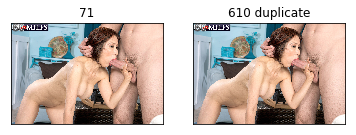

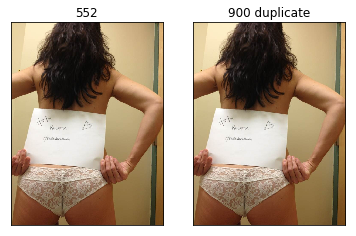

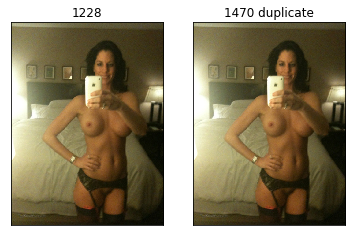

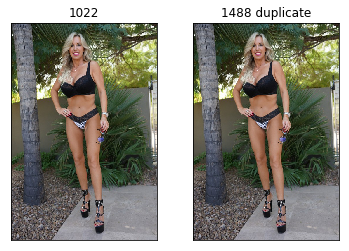

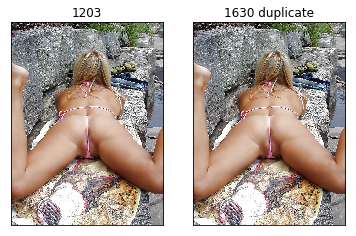

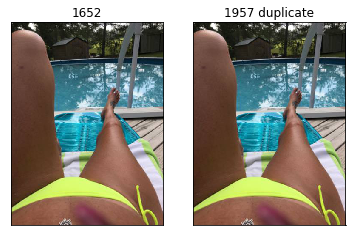

In [11]:
file_list = os.listdir()
for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(file_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [12]:
for index in duplicates:
    os.remove(file_list[index[0]])

In [13]:
filepath = r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\SFW'
os.chdir(filepath)
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))
            
print(duplicates)

[(964, 460), (1078, 762), (1109, 492), (1120, 914), (1360, 391), (1375, 1339), (1385, 658), (1394, 1387), (1401, 1224), (1462, 1348), (1518, 1203), (1541, 1335), (1545, 1527), (1561, 1172), (1572, 1556), (1601, 151), (1603, 1191), (1651, 1145), (1665, 1235), (1666, 1470), (1687, 1329), (1702, 761), (1736, 1527), (1780, 1278), (1782, 1695), (1794, 1579), (1805, 385), (1816, 108), (1818, 1240), (1837, 257), (1866, 1813), (1883, 1221), (1908, 1419), (1927, 1760), (1934, 779), (1941, 668), (1963, 191), (1980, 1185), (2004, 225), (2014, 1513)]


C:\Users\Harshinee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\Harshinee\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


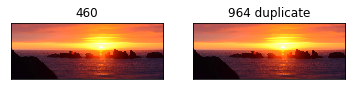

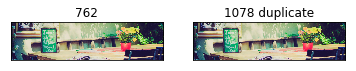

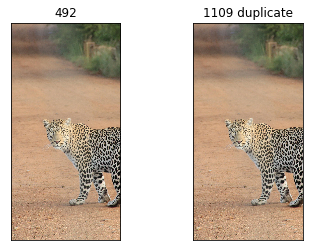

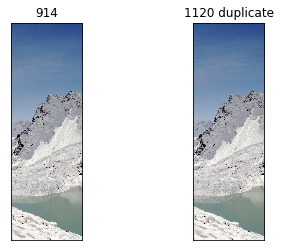

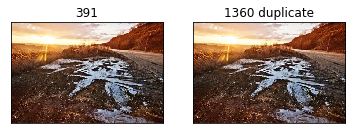

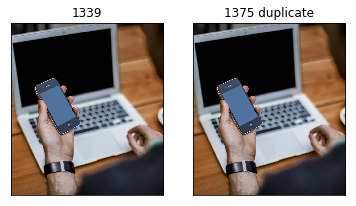

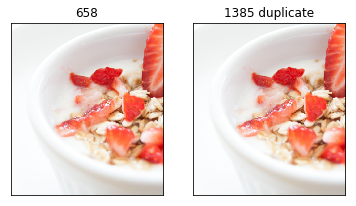

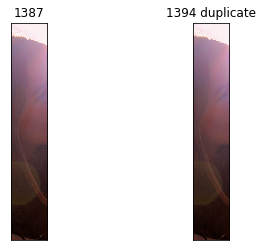

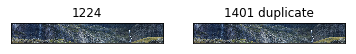

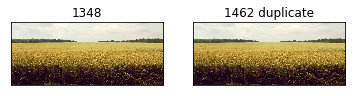

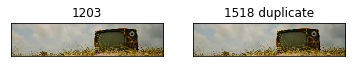

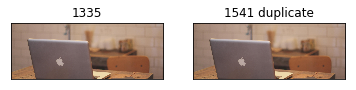

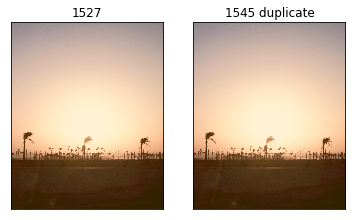

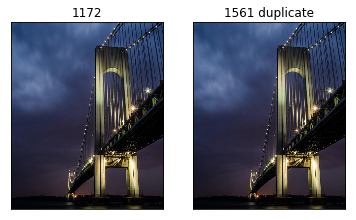

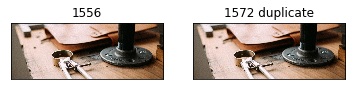

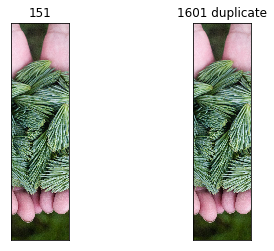

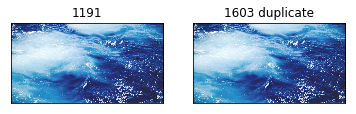

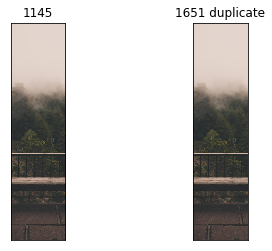

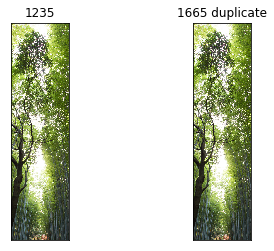

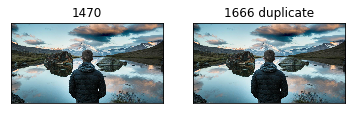

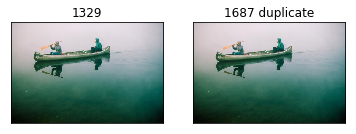

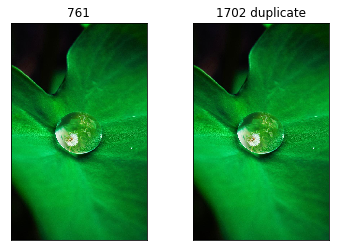

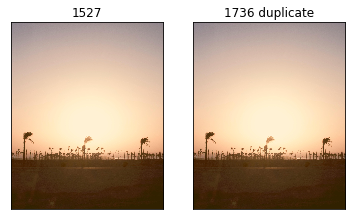

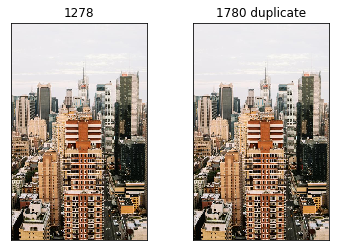

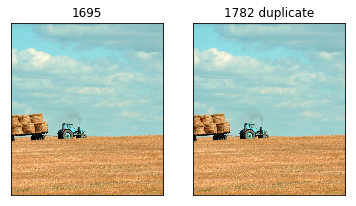

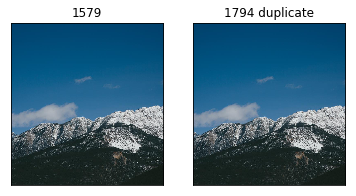

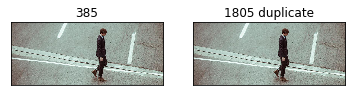

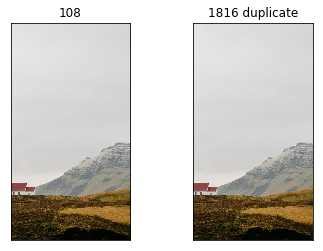

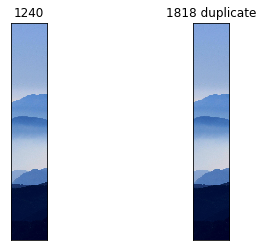

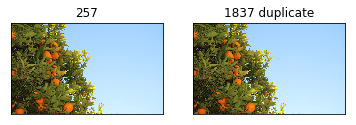

In [14]:
file_list = os.listdir()
for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(file_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [15]:
for index in duplicates:
    os.remove(file_list[index[0]])

- # Step 5: Splitting the data into train, validation, and test sets

The following simple script splits the image datasets into train (60% - 1200 images), validation (20% - 400 images) and test (20% - images)

In [18]:
os.chdir(r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\NSFW')

for i in range(1200):
    file = random.choice(os.listdir())
    shutil.move(file, r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\Train\NSFW')

In [19]:
for i in range(400):
    file = random.choice(os.listdir())
    shutil.move(file, r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\Test\NSFW')

In [20]:
for i in range(400):
    file = random.choice(os.listdir())
    shutil.move(file, r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\Validation\NSFW')

In [21]:
os.chdir(r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\SFW')

for i in range(1200):
    file = random.choice(os.listdir())
    shutil.move(file, r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\Train\SFW')

In [22]:
for i in range(400):
    file = random.choice(os.listdir())
    shutil.move(file, r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\Validation\SFW')

In [23]:
for i in range(400):
    file = random.choice(os.listdir())
    shutil.move(file, r'C:\Users\Harshinee\Desktop\Outreachy\Wikimedia\NSFW Classifier\Data\binary_classifier\Test\SFW')